In [1]:
#Neural network
#trauning data
p1 = [147]
p2 = [150]
p3 = [153]
p4 = [155]
p5 = [158]
p6 = [160]
p7 = [163]
p8 = [165]
p9 = [168]
p10 = [170]
p11 = [173]
p12 = [175]
p13 = [178]
p14 = [180]
p15 = [183]

import numpy as np
X = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, p15])
y = np.array ([49,50,51,52,54,56,58,59,60,62,63,64,66,67,68])
print(X.shape, y.shape)
#Testing data
p16 =[156]
p17 =[176]
X_test = np.array([p16, p17])
y_test = np.array([52,66])
print(X_test.shape, y_test.shape)

(15, 1) (15,)
(2, 1) (2,)


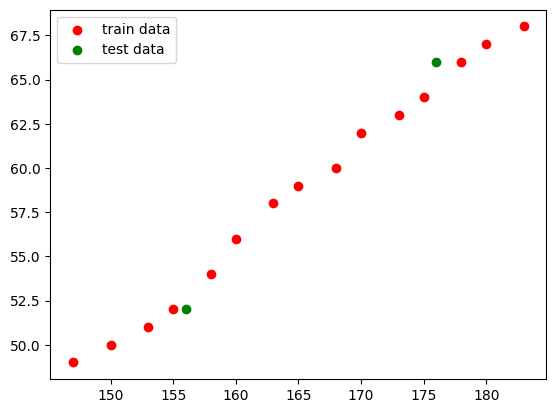

In [3]:
#visualization
import matplotlib.pyplot as plt
plt.scatter(X,y,c='r',label='train data')
plt.scatter(X_test,y_test,c='g',label='test data')
plt.legend()
plt.show()

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Assuming X, X_test, y, y_test are already defined
norm_layer = layers.Normalization(axis=-1)
norm_layer.adapt(X)
Xn = norm_layer(X)
Xn_test = norm_layer(X_test)

print("Xn",Xn)
print("Xn_test",Xn_test)

# Changing the shape of y_data to (n,1)
Y = y.reshape(-1, 1)
Y_test = y_test.reshape(-1, 1)

print(Xn.shape, Y.shape)
print(Xn_test.shape, Y_test.shape)


Xn tf.Tensor(
[[-1.6677371 ]
 [-1.3928354 ]
 [-1.1179336 ]
 [-0.9346658 ]
 [-0.659764  ]
 [-0.47649613]
 [-0.20159435]
 [-0.01832651]
 [ 0.2565753 ]
 [ 0.43984312]
 [ 0.7147449 ]
 [ 0.89801276]
 [ 1.1729145 ]
 [ 1.3561823 ]
 [ 1.6310842 ]], shape=(15, 1), dtype=float32)
Xn_test tf.Tensor(
[[-0.8430318]
 [ 0.9896467]], shape=(2, 1), dtype=float32)
(15, 1) (15, 1)
(2, 1) (2, 1)


In [21]:
#training
from keras import models, layers, losses, optimizers, metrics

model = models.Sequential([
        layers.Dense(units=1, activation='linear', name= 'output')    
])
model.compile(   
        loss = losses.MeanSquaredError(),
        optimizer = optimizers.SGD(learning_rate=0.01) 
)
model.fit(Xn,Y, epochs=1000, verbose=0)
#evaluation
from sklearn import metrics
Y_test_hat = model.predict(Xn_test)
print(Y_test_hat)
print(metrics.mean_squared_error(Y_test, Y_test_hat))
print(metrics.r2_score(Y_test, Y_test_hat))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[53.412815]
 [64.6891  ]]
1.8572498015200836
0.9620969295501709


In [25]:
#training
from keras import models, layers, losses, optimizers, metrics

model = models.Sequential([
        layers.Dense(units=3, activation='linear', name= 'hidden'),   
        layers.Dense(units=1, activation='linear', name= 'output')    
])
model.compile(   
        loss = losses.MeanSquaredError(),
        optimizer = optimizers.SGD(learning_rate=0.01) 
)
model.fit(Xn,Y, epochs=1000, verbose=0)
#evaluation
from sklearn import metrics
Y_test_hat = model.predict(Xn_test)
print(Y_test_hat)
print(metrics.mean_squared_error(Y_test, Y_test_hat))
print(metrics.r2_score(Y_test, Y_test_hat))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[53.522606]
 [64.82652 ]]
1.8476886948628817
0.9622920751571655


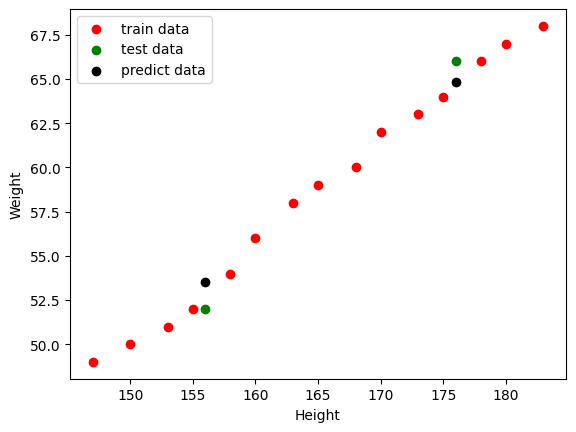

In [27]:
plt.scatter(X, Y, c='r', label='train data')
plt.scatter(X_test, Y_test, c='g', label='test data')
plt.scatter(X_test, Y_test_hat, c='k', label='predict data')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()